In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
dataset = pd.read_csv(r'D:\datasets\star\Stars.csv')
dataset.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


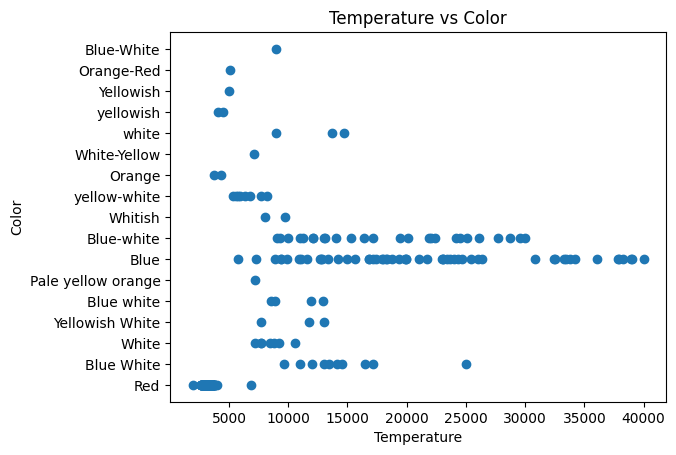

In [4]:
plt.scatter(dataset['Temperature'], dataset['Color'])
plt.title("Temperature vs Color")
plt.xlabel("Temperature")
plt.ylabel("Color")
plt.show()

In [36]:
import pandas as pd
from sklearn import preprocessing

# Assuming df is your DataFrame
le = preprocessing.LabelEncoder()

for column in dataset.columns:
    if dataset[column].dtype == type(object):
        dataset[column] = le.fit_transform(dataset[column])


In [37]:
x = dataset[['Temperature', 'L', 'R', 'A_M', 'Spectral_Class', 'Type']]
x.head()

,Temperature,L,R,A_M,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,5,0
1,3042,0.000500,0.1542,16.60,5,0
2,2600,0.000300,0.1020,18.70,5,0
3,2800,0.000200,0.1600,16.65,5,0
4,1939,0.000138,0.1030,20.06,5,0


In [38]:
y = dataset['Color']
y.head()

0    8
1    8
2    8
3    8
4    8
Name: Color, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
len(x_train)

192

In [41]:
len(x_test)

48

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest_class = RandomForestClassifier(n_estimators=100, criterion='gini')

In [43]:
random_forest_class.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
random_forest_class.predict(x_test)

array([ 1,  8,  8,  9,  8,  0,  8,  8,  8,  0,  0,  8,  4,  8,  8,  8,  0,
        8,  1,  8,  8, 13,  8,  9, 15, 15,  8, 14,  8,  1,  0,  0,  8,  8,
        0,  8,  8, 10, 13,  4,  9,  8,  4,  1,  8,  8,  0,  4],
      dtype=int64)

In [47]:
random_forest_class.score(x_test, y_test)

0.8333333333333334

In [50]:
features = ['Temperature', 'L', 'R', 'A_M', 'Spectral_Class', 'Type']

In [51]:
feature_imp = pd.Series(random_forest_class.feature_importances_, index=features).sort_values(ascending=False)

In [52]:
feature_imp

Temperature       0.299636
Spectral_Class    0.203061
L                 0.139013
A_M               0.131662
R                 0.120251
Type              0.106378
dtype: float64

In [63]:
a = dataset[['Temperature', 'L','A_M', 'Spectral_Class']]
b = dataset['Color']

In [64]:
a.head()

,Temperature,L,A_M,Spectral_Class
0,3068,0.002400,16.12,5
1,3042,0.000500,16.60,5
2,2600,0.000300,18.70,5
3,2800,0.000200,16.65,5
4,1939,0.000138,20.06,5


In [65]:
b.head()

0    8
1    8
2    8
3    8
4    8
Name: Color, dtype: int64

In [66]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)

In [67]:
random_forest_class2 = RandomForestClassifier()

In [68]:
random_forest_class2.fit(a_train, b_train)

RandomForestClassifier()

In [69]:
random_forest_class2.predict(a_test)

array([ 8,  1,  4,  8,  9,  8,  0, 16,  8,  8,  8,  0,  8,  8,  0,  0,  8,
        0,  4,  8,  0,  4, 15,  1,  9,  4,  8,  8,  8,  8,  9,  4,  8,  8,
        4,  8,  8,  8,  8,  8,  2,  0, 15,  8,  1,  8,  8,  4],
      dtype=int64)

In [74]:
# 3068	0.002400	0.1700	16.12	5	0
# 	3042	0.000500	0.1542	16.60	5	0
# 	2600	0.000300	0.1020	18.70	5	0
# 	2800	0.000200	0.1600	16.65	5	0
# 	1939	0.000138	0.1030	20.06	5	0
random_forest_class2.predict([[3068, 0.000138,  20.06, 5]])

c:\Users\Aliasger B\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([8], dtype=int64)

In [70]:
random_forest_class2.score(a_test, b_test)

0.875

58    8
Name: Color, dtype: int64